# Titanic Dataset: Exploratory Data Analysis

이 노트북에서는 캐글에서 가장 유명한 데이터 셋인 타이타닉 데이터를 분석할 것이다.

데이터를 통해 생존 여부를 예측하는 것이 타이타닉 경진대회의 목적이지만, 
여기서는 몇가지 탐사분석을 수행할 것이다.


알고싶은 것들
- 타이타닉 탑승자에 대한 분석 (나이. 성별, Class 등)
- 어떤 사람이 돈을 많이 내는가?
- 어떤 사람이 생존하였는가?

In [124]:
% %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
train = pd.read_csv("train.csv")

In [6]:
# Train dataset 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#train dataset의 정보나열
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


위 정보를 통해, 총 891개의 데이터가 존재한다는 것을 확인

또한, Age에서 177개, Cabin에서 687개, Embarked에서 2개의 Missing Data가 있다는 것을 발견

In [9]:
# 기술 통계학적 관점으로 데이터보기(평균,분산,최대값, 최소값,사분위수)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


위 데이터를 통해 생존자는 1로 사망자는 0으로 표현되었다는 것을 알수 있다.

또한, Survivied의 Mean을 통해 전체 생존율이 약 38%라는 것을 알수 있다.

##  탑승자에 대한 분석 (나이, 성별, Class)

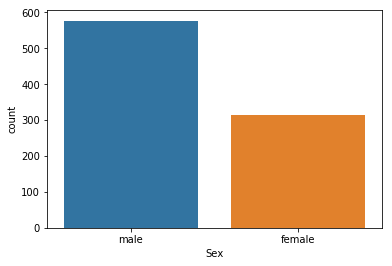

In [15]:
#countplot 통해 전체 탑승자 중 남여 비중확인
sns.countplot(train['Sex'])

남성 탑승자의 수가 여성 탑승자 수보다 월등히 많을 것을 확인할 수 있다.

그렇다면 각 class의 남여 비중은 어떻게되는가?

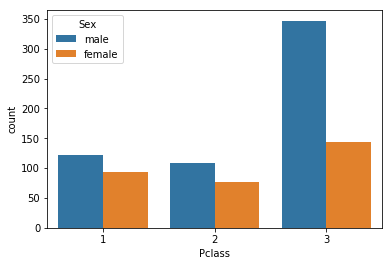

In [17]:
#hue를 이용해 class당 남여 비중을 확인
sns.countplot(train["Pclass"],hue=train["Sex"])

모든 Class에서 남성이 많다는 것을 확인할 수 있고 상대적으로 class 3의 탑승자가 많다는 것을 확인할 수 있다.

그렇다면 class마다 어떤 연령대가 탑승한 것인가?

In [46]:
#분석을 위해 Missig된 Age는 평균으로 대체한다.
#보다 정확한 평균값을 찾기 위해서 Outlier을 제거하고 신뢰구간 95% 분포에서의 평균값을 구한다.

In [53]:
#NaN값을 제거한 Age
find_mean = train[train['Age'].notnull()]
find_mean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
find_mean.describe()["Age"]

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [60]:
# 95% 신뢰구간 찾기
def con_interval(mean,std):
    min_interval = mean - std * 1.96
    max_interval = mean + std * 1.96
    return min_interval,max_interval

In [67]:
con_interval(find_mean["Age"].mean(),find_mean["Age"].std())

(1.2271828756840932, 58.17105241843355)

1세에서 58세에 95%의 데이터가 존재한다는 것을 알 수 있다.

이제  Age 평균값을 구하자

In [73]:
int(find_mean[(find_mean["Age"] >= 1) & (find_mean["Age"] < 59)]["Age"].mean())

28

In [76]:
# 28세로 Missig Data 대체
train.loc[train["Age"].isnull(),"Age"] = 28

탑승객을 연령대별로 분류하는 칼럼을 생성한다.

In [82]:
train["Range_of_Age"] = 0

In [86]:
train.loc[(train["Age"] >= 10) & (train["Age"] < 20), "Range_of_Age"] = 10
train.loc[(train["Age"] >= 20) & (train["Age"] < 30), "Range_of_Age"] = 20
train.loc[(train["Age"] >= 30) & (train["Age"] < 40), "Range_of_Age"] = 30
train.loc[(train["Age"] >= 40) & (train["Age"] < 50), "Range_of_Age"] = 40
train.loc[(train["Age"] >= 50) & (train["Age"] < 60), "Range_of_Age"] = 50
train.loc[(train["Age"] >= 60) & (train["Age"] < 70), "Range_of_Age"] = 60
train.loc[(train["Age"] >= 70) & (train["Age"] < 80), "Range_of_Age"] = 70
train.loc[(train["Age"] >= 80) & (train["Age"] < 90), "Range_of_Age"] = 80

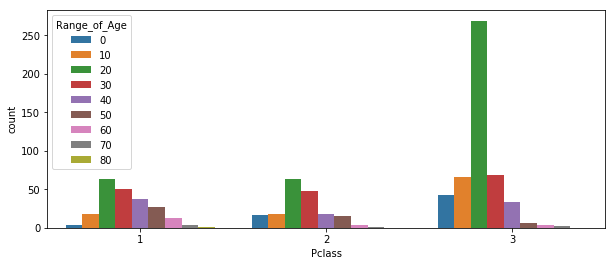

In [93]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,4)
sns.countplot(train["Pclass"],hue=train["Range_of_Age"])

상대적으로 젋은층(10대이하, 10대 부터 30대까지)가 class 3를 많이 이용한것을 알수 있다.

노년층으로 갈수록 높은 Class를 이용한다는 것을 이용한다는 것을 확인 가능하다.

탑승객의 세대분포도 확인해보자

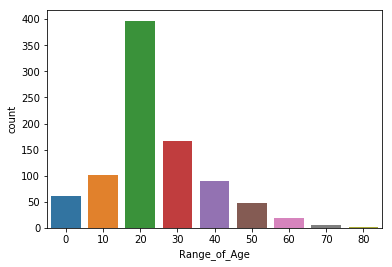

In [105]:
sns.countplot(train["Range_of_Age"])

20대가 가장 많다는 것을 확인할 수 있다.

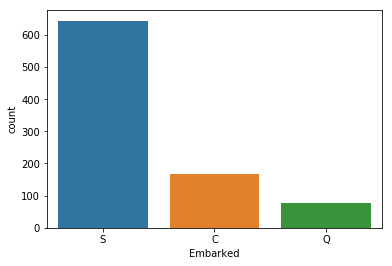

In [217]:
# Embarked는 출발지를 의미한다.
sns.countplot(train["Embarked"])

S 지역에서 사람들이 가장 많이 배에 탑승했다.

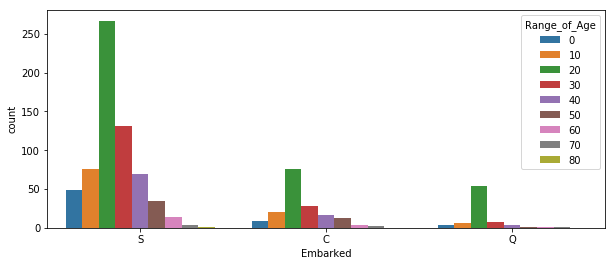

In [219]:
figure, ax= plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,4)
sns.countplot(train["Embarked"],hue=train['Range_of_Age'])

연령대별로 보아도 차이가 없다.

## 어떤 사람이 돈을 많이 내는가?

먼저 pclass와 Fare의 관계를 분석해보자 

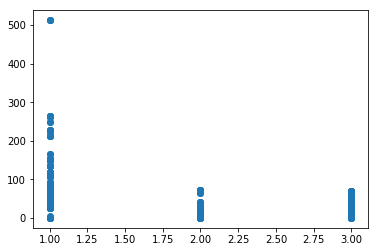

In [220]:
# class와 Fare의 관계
plt.scatter(data=train, x='Pclass',y="Fare")

Class 1은 확실히 다른 Class보다 Fare가 높다. 하지만 2와 3사이에는 큰차이가 없다.

또한 모든 Class에서 충첩되는 구간이 존재한다. 왜일까?

____________________________________________

Class가 같더라도 가족과 같이 탑승한 사람일수록 돈을 더 많이 내지는 것이 아닐까?

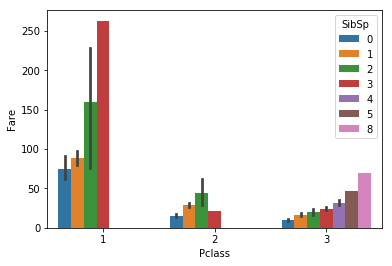

In [214]:
#sibsp는 형제자매 / 배우자 를 의마한다.
sns.barplot(x=sample['Pclass'],y=sample["Fare"],hue=sample["SibSp"])

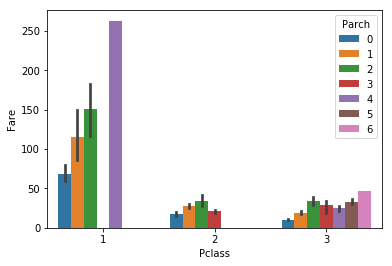

In [216]:
# parch는 부모님 / 아이 를 의미한다.
sns.barplot(x=sample['Pclass'],y=sample["Fare"],hue=sample["Parch"])

예상과 같이 가족이 인원이 많을수록 돈을 더 많이 지불하는 것을 볼수있다

## 어떤 사람이 생존하였는가?

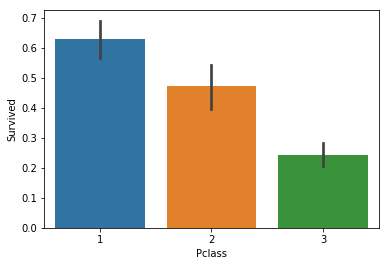

In [225]:
#Pclass와 생존여부의 관계
sns.barplot(data=train,x='Pclass',y='Survived')

돈을 많이 지불한 사람들의 생존율이 높은 것을 알수있다.

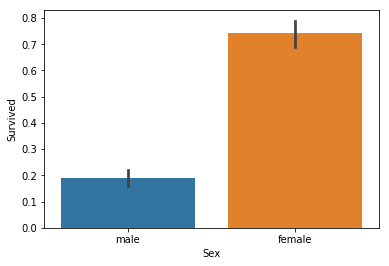

In [226]:
#성별에 따른 생존여부
sns.barplot(data=train, x='Sex',y="Survived")

성별에 따라 생존율의 큰차이를 보이고 있다. 여성은 대부분 생존했고 남성은 죽었다.

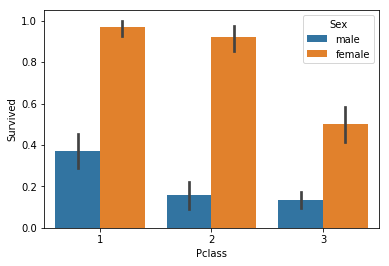

In [227]:
#Pclass 추가
sns.barplot(data=train,x='Pclass',y='Survived',hue="Sex")

Class 가 높은 곳에 탑승한 남성들도 어느 정도 생존한 것을 확인 할수있다. 

_____________________________________

그렇다면 연령을 연관이 있는가? 확인해보자.

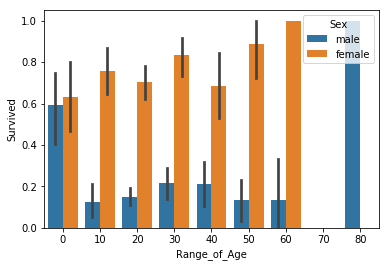

In [229]:
sns.barplot(data= train,x="Range_of_Age",y="Survived",hue="Sex")

10대 이하의 경우 0.5보다 높은 생존율을 보인다.

여성의 경우 50대 이상으로 갈수록 생존율이 상승하는 것을 보인다.

즉 연령대가 낮거나 아니면 높은 경우 생존율이 높다 -> 여성에 경우 적용

_________________________________

가족이 있는 사람이 생존율이 높을까? 

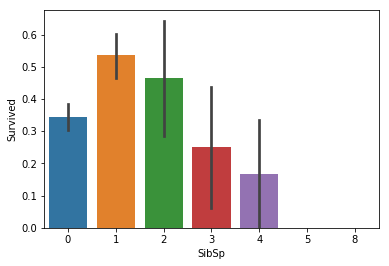

In [230]:
sns.barplot(data= train,x="SibSp",y="Survived")

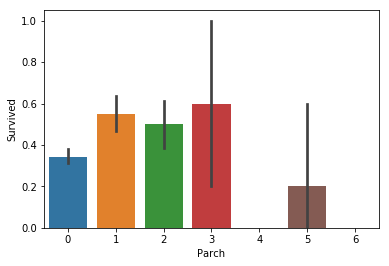

In [232]:
sns.barplot(data= train,x="Parch",y="Survived")

위 그래프를 통해 가족 수가 특정(3명)이상으로 많을 경우 생존율이 급격하게 낮아진다는 것을 확인할 수 있다.